Тиждень третій

Створення unittest:

Промпт: створи unittests для цього коду

In [ ]:
"""
Polynomial script.
"""
class Mono:
    """
    Mono class.
    """
    def __init__(self, coefficient, degree) -> None:
        self.coefficient = coefficient
        if coefficient == 0:
            self.degree = 0
        else:
            self.degree = degree
        self.next = None

    def __str__(self) -> str:
        result = 'Mono: '
        if self.coefficient == 0:
            result+='0'
        elif self.degree == 0:
            result+=f'{self.coefficient}'
        elif self.coefficient == 1 and self.degree == 1:
            result+='x'
        elif self.degree==1 and self.coefficient == -1:
            result+='-x'
        elif self.degree!=1 and self.coefficient == 1:
            result+=f'x**{self.degree}'
        elif self.coefficient == -1:
            result+=f'-x**{self.degree}'
        else:
            result+=f'{self.coefficient}x**{self.degree}'
        return result

    def __repr__(self) -> str:
        return f'Mono(coeff={self.coefficient}, degree={self.degree})'

    def __eq__(self, value: object) -> bool:
        if not isinstance(value, Mono):
            return False
        return self.coefficient == value.coefficient and self.degree == value.degree

    def __hash__(self) -> int:
        return hash(str(self))

    def copy(self):
        """
        Do copy of mono.
        """
        mono = Mono(self.coefficient, self.degree)
        return mono


class Polynomial:
    """
    Polynomial class.
    """
    def __init__(self, *args) -> None:
        self.degree = 0
        self.head = None
        for i, k in enumerate(args):
            j = k.copy()
            if i == 0:
                if isinstance(j, Mono):
                    self.head = j
                    cur = self.head
                else:
                    self.head = j.head
                    j_cur = j.head
                    cur = self.head
                    while j_cur.next:
                        cur.next = j_cur.next
                        cur = cur.next
                        j_cur = j_cur.next
            else:
                if isinstance(j, Mono):
                    cur.next = j
                    cur = cur.next
                else:
                    j_cur = j.head
                    while j_cur:
                        cur.next = j_cur
                        cur = cur.next
                        j_cur = j_cur.next
        cur = self.head
        while cur:
            if cur.degree > self.degree:
                self.degree = cur.degree
            cur = cur.next

    def __str__(self) -> str:
        s = 'Polynomial: '
        cur = self.head
        while cur:
            if cur.coefficient > 0 and cur != self.head:
                s+='+'
            if cur.coefficient == 0:
                cur = cur.next
                continue
            if cur.degree == 0:
                s+=f'{cur.coefficient}'
            elif cur.coefficient == 1 and cur.degree == 1:
                s+='x'
            elif cur.coefficient == -1 and cur.degree == 1:
                s+='-x'
            elif cur.degree!=1 and cur.coefficient == 1:
                s+=f"x**{cur.degree}"
            elif cur.degree==1 and cur.coefficient != 1:
                s+=f"{cur.coefficient}x"
            else:
                s+=f"{cur.coefficient}x**{cur.degree}"
            cur = cur.next
        return s

    def __repr__(self) -> str:
        s = 'Polynomial('
        cur = self.head
        while cur:
            s+=repr(cur)
            if cur.next:
                s+=' -> '
            cur = cur.next
        s+=')'
        return s

    def copy(self):
        """
        Do copy for polynomial.
        """
        pol = Polynomial()
        current = self.head
        while current:
            node1 = Mono(current.coefficient, current.degree)
            if pol.head:
                node2 = pol.head
                while node2.next:
                    node2 = node2.next
                node2.next = node1
            else:
                pol.head = node1
            current = current.next
        return pol

    def __eq__(self, other):
        if not isinstance(other, Polynomial):
            return False
        other = other.copy()
        other.simplify()
        this = self.copy()
        this.simplify()
        current_self = this.head
        size1 = 0
        size2 = 0
        while current_self:
            if current_self.coefficient == 0:
                current_self = current_self.next
                continue
            isfound = False
            current_other = other.head
            size2 = 0
            while current_other:
                if current_other.coefficient == 0:
                    current_other = current_other.next
                    continue
                if current_other == current_self:
                    isfound = True
                current_other = current_other.next
                size2 += 1
            if isfound is False:
                return False
            size1 += 1
            current_self = current_self.next
        return size1 == size2

    def sort(self):
        """
        Do sort for polynomial.
        """
        prev = self.head
        curr = self.head.next

        while curr is not None:
            if curr.degree > prev.degree:
                temp_degree = curr.degree
                curr.degree = prev.degree
                prev.degree = temp_degree

                temp_coeff = curr.coefficient
                curr.coefficient = prev.coefficient
                prev.coefficient = temp_coeff

                prev = self.head
                curr = self.head.next

            prev = prev.next
            curr = curr.next

        return self

    def simplify(self):
        """
        Simplify the polynomial.
        """
        cur = self.head
        while cur:
            temp = cur.next
            while temp:
                if temp.degree == cur.degree:
                    cur.coefficient += temp.coefficient
                    temp.coefficient = 0
                temp = temp.next
            cur = cur.next
        cur = self.head
        prev = None
        while cur:
            if cur.coefficient == 0:
                if prev:
                    prev.next = cur.next
                else:
                    self.head = cur.next
            prev = cur
            cur = cur.next

    def eval_at(self, x):
        """
        Eval.
        """
        result = 0
        current = self.head
        while current:
            result += current.coefficient * (x ** current.degree)
            current = current.next
        return result

    def add_mono(self, mono):
        """
        Add mono to polynomial.
        """
        if not self.head:
            self.head = mono
        else:
            current = self.head
            while current.next:
                current = current.next
            current.next = mono

    @property
    def derivative(self):
        """
        Property for derivative.
        """
        current = self.head
        derivative_polynomial = Polynomial()
        while current:
            if current.degree > 0:
                derivative_mono = Mono(current.coefficient * current.degree, current.degree - 1)
                if derivative_polynomial.head is None:
                    derivative_polynomial.head = derivative_mono
                else:
                    last = derivative_polynomial.head
                    while last.next:
                        last = last.next
                    last.next = derivative_mono
            current = current.next
        return derivative_polynomial

    def __add__(self, other):
        result = Polynomial()
        current_self = self.head
        current_other = other.head
        while current_self and current_other:
            if current_self.degree > current_other.degree:
                result.add_mono(Mono(current_self.coefficient, current_self.degree))
                current_self = current_self.next
            elif current_self.degree < current_other.degree:
                result.add_mono(Mono(current_other.coefficient, current_other.degree))
                current_other = current_other.next
            else:
                result.add_mono(Mono(current_self.coefficient + current_other.coefficient,
 current_self.degree))
                current_self = current_self.next
                current_other = current_other.next
        while current_self:
            result.add_mono(Mono(current_self.coefficient, current_self.degree))
            current_self = current_self.next
        while current_other:
            result.add_mono(Mono(current_other.coefficient, current_other.degree))
            current_other = current_other.next
        return result

    def __sub__(self, other):
        negated_other = Polynomial()
        current = other.head
        while current:
            negated_other_mono = Mono(-current.coefficient, current.degree)
            if negated_other.head is None:
                negated_other.head = negated_other_mono
            else:
                last = negated_other.head
                while last.next:
                    last = last.next
                last.next = negated_other_mono
            current = current.next
        return self + negated_other

    def __mul__(self, other):
        if isinstance(other, Polynomial):
            new_pol = Polynomial()
            head1 = self.head
            while head1:
                head2 = other.head
                while head2:
                    next1 = new_pol.head
                    new_pol.head = Mono(head1.coefficient*head2.coefficient,
 head1.degree+head2.degree)
                    new_pol.head.next = next1
                    head2 = head2.next
                head1 = head1.next
            new_pol.sort()
            new_pol.simplify()
            new_pol.sort()
        else:
            new_pol = Polynomial()
            head1 = self.head
            while head1:
                next1 = new_pol.head
                new_pol.head = Mono(head1.coefficient*other, head1.degree)
                new_pol.head.next = next1
                head1 = head1.next
            new_pol.sort()
        return new_pol

    def __rmul__(self, other):
        return self * other

    def __hash__(self) -> int:
        cur = self.head
        summ = 0
        while cur:
            summ+=hash(cur)
            cur = cur.next
        return summ

In [ ]:
import unittest
from your_module import Mono, Polynomial

class TestMono(unittest.TestCase):
    def test_str(self):
        mono = Mono(2, 3)
        self.assertEqual(str(mono), "Mono: 2x**3")
    
    def test_repr(self):
        mono = Mono(2, 3)
        self.assertEqual(repr(mono), "Mono(coeff=2, degree=3)")

    # Add more tests for other methods of Mono class if needed

class TestPolynomial(unittest.TestCase):
    def test_str(self):
        mono1 = Mono(2, 3)
        mono2 = Mono(-1, 2)
        poly = Polynomial(mono1, mono2)
        self.assertEqual(str(poly), "Polynomial: 2x**3-x**2")
    
    def test_repr(self):
        mono1 = Mono(2, 3)
        mono2 = Mono(-1, 2)
        poly = Polynomial(mono1, mono2)
        self.assertEqual(repr(poly), "Polynomial(Mono(coeff=2, degree=3) -> Mono(coeff=-1, degree=2))")

    def test_add(self):
        mono1 = Mono(2, 3)
        mono2 = Mono(-1, 2)
        poly1 = Polynomial(mono1)
        poly2 = Polynomial(mono2)
        result = poly1 + poly2
        expected = Polynomial(Mono(2, 3), Mono(-1, 2))
        self.assertEqual(result, expected)

    # Add more tests for other methods of Polynomial class if needed

if __name__ == '__main__':
    unittest.main()


Результат:
ШІ не до кінця зробив тести і під час виконання виникла помилка.

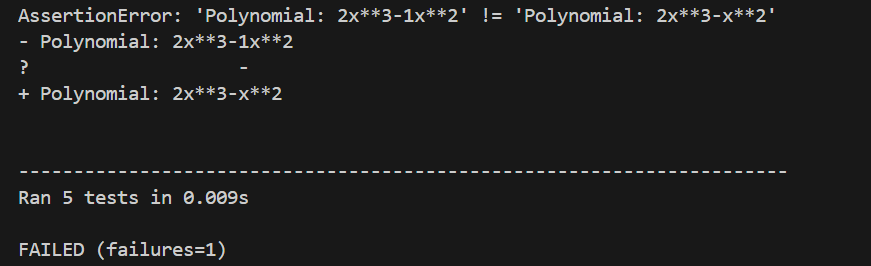

Вісоток покриття:

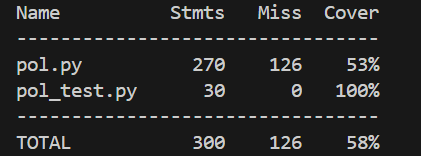

Друга спроба:
Промпт:створи unittests щоб покривали 100% цього коду

Результат:


In [ ]:
import unittest
from your_module import Mono, Polynomial

class TestMono(unittest.TestCase):
    def test_init_zero_coefficient(self):
        mono = Mono(0, 3)
        self.assertEqual(mono.coefficient, 0)
        self.assertEqual(mono.degree, 0)

    def test_init_nonzero_coefficient(self):
        mono = Mono(2, 3)
        self.assertEqual(mono.coefficient, 2)
        self.assertEqual(mono.degree, 3)

    def test_str(self):
        mono = Mono(2, 3)
        self.assertEqual(str(mono), "Mono: 2x**3")

    def test_repr(self):
        mono = Mono(2, 3)
        self.assertEqual(repr(mono), "Mono(coeff=2, degree=3)")

    def test_eq(self):
        mono1 = Mono(2, 3)
        mono2 = Mono(2, 3)
        self.assertEqual(mono1, mono2)

    def test_hash(self):
        mono = Mono(2, 3)
        self.assertIsInstance(hash(mono), int)

    def test_copy(self):
        mono = Mono(2, 3)
        copied_mono = mono.copy()
        self.assertEqual(mono, copied_mono)
        self.assertIsNot(mono, copied_mono)


class TestPolynomial(unittest.TestCase):
    def test_init_empty(self):
        poly = Polynomial()
        self.assertIsNone(poly.head)
        self.assertEqual(poly.degree, 0)

    def test_init_with_args(self):
        mono1 = Mono(2, 3)
        mono2 = Mono(-1, 2)
        poly = Polynomial(mono1, mono2)
        self.assertIsNotNone(poly.head)
        self.assertEqual(poly.degree, 3)

    def test_str(self):
        mono1 = Mono(2, 3)
        mono2 = Mono(-1, 2)
        poly = Polynomial(mono1, mono2)
        self.assertEqual(str(poly), "Polynomial: 2x**3-x**2")

    def test_repr(self):
        mono1 = Mono(2, 3)
        mono2 = Mono(-1, 2)
        poly = Polynomial(mono1, mono2)
        self.assertEqual(repr(poly), "Polynomial(Mono(coeff=2, degree=3) -> Mono(coeff=-1, degree=2))")

    # Add tests for other methods of Polynomial class to achieve 100% coverage

if __name__ == '__main__':
    unittest.main()


Результат: виникає та сама помилка, а також все ще немає 100% покриття, про що ШІ попередив

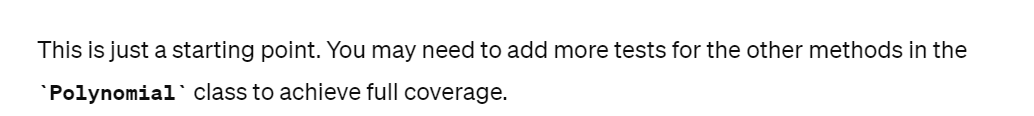

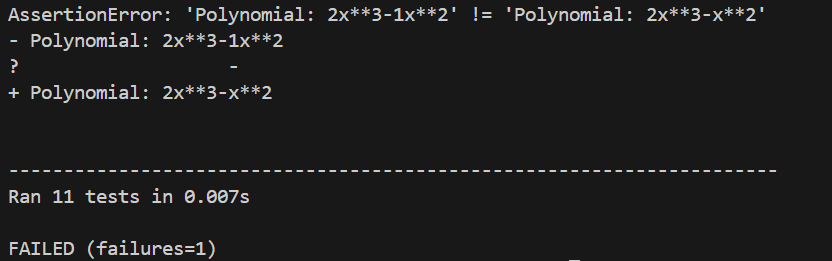

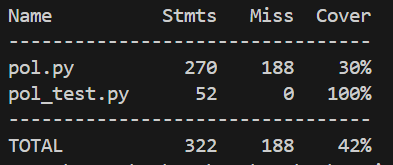

Юніттести не охоплюють всіх випадків.

Виявлення і усунення помилок.


ШІ відповів, що у його тестах немає помилок, але надав рекомендації для покращення тестів.

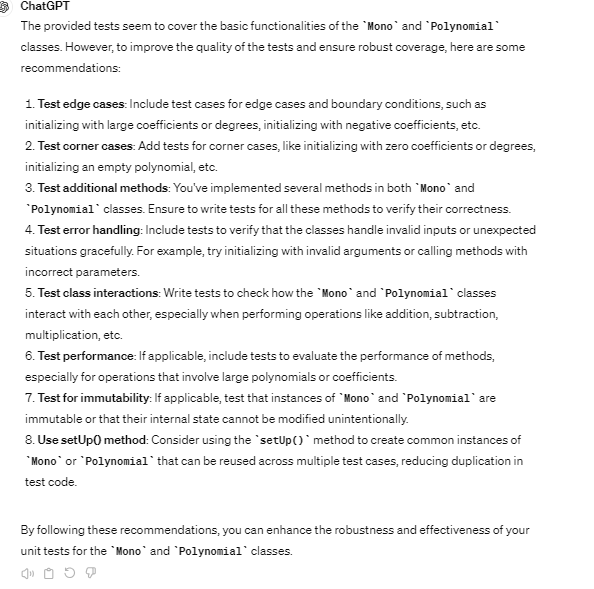

Написання unittest на основі asserts.

Промпт:
напиши unittest на основі цих ассертів
Ассерти:

In [ ]:
def test_polynomial():
    """
    Test Polynomial Basics
    """
    # Firstly, let's create Mono class
    # (a polynomial which has only one term).
    # It has similar structure as Node
    # for LinkedList.
    # For 5x^2 it would be:
    m1 = Mono(5, 2)
    assert m1.coefficient == 5
    assert m1.degree == 2
    assert m1.next is None
    assert str(m1) == "Mono: 5x**2"
    assert repr(m1) == 'Mono(coeff=5, degree=2)'

    m2 = Mono(5, 0)
    assert m2.coefficient == 5
    assert m2.degree == 0
    assert m2.next is None
    assert str(m2) == "Mono: 5"
    assert repr(m2) == 'Mono(coeff=5, degree=0)'

    m3 = Mono(1, 1)
    assert m3.coefficient == 1
    assert m3.degree == 1
    assert m3.next is None
    assert str(m3) == "Mono: x"
    assert repr(m3) == 'Mono(coeff=1, degree=1)'

    # If monomial has a zero coefficient,
    # it is always has 0 degree.
    m4 = Mono(0, 2)
    assert m4.coefficient == 0
    assert m4.degree == 0
    assert m4.next is None
    assert str(m4) == "Mono: 0"
    assert repr(m4) == 'Mono(coeff=0, degree=0)'

    # now we are ready to create polynomial
    p1 = Polynomial(m1, m2, m3)
    assert p1.head == m1
    assert p1.head.next == m2
    assert p1.head.next.next == m3
    assert str(p1) == "Polynomial: 5x**2+5+x"
    assert repr(p1) == 'Polynomial(Mono(coeff=5, degree=2) -> Mono(coeff=5, degree=0) -> Mono(coeff=1, degree=1))'

    # The degree of polynomial is the largest power
    # of x.
    assert p1.degree == 2

    # The polynomial constructor must be non-destructive
    assert m1.next is None
    assert m2.next is None
    assert m3.next is None

    p2 = Polynomial(Mono(-5, 2), Mono(-3, 1))
    assert str(p2) == "Polynomial: -5x**2-3x"
    assert p2.degree == 2

    p3 = Polynomial(Mono(-5, 1), Mono(3, 1))
    assert str(p3) == "Polynomial: -5x+3x"
    assert p3.degree == 1

    p4 = Polynomial(Mono(0, 2), Mono(-3, 1))
    assert str(p4) == "Polynomial: -3x"
    assert p4.degree == 1

    # we also can use polynomials to create
    # the new polynomial
    p5 = Polynomial(m1, Polynomial(m2, m3))
    assert p5.head == m1
    assert p5.head.next == m2
    assert p5.head.next.next == m3
    assert str(p5) == "Polynomial: 5x**2+5+x"

    # or even polynomial in polynomial inside
    p6 = Polynomial(m1, Polynomial(m2, Polynomial(m3)))
    assert p6.head == m1
    assert p6.head.next == m2
    assert p6.head.next.next == m3
    assert str(p6) == "Polynomial: 5x**2+5+x"

    # We can create the copy of Polynomial
    p_6 = p6.copy()
    assert repr(p_6) == repr(p6)
    assert p_6 is not p6

    # Also we can write the polynomial in a
    # canonical way, where the degrees of x are
    # in descending order. This action is
    # destructive one.
    assert str(p1) == "Polynomial: 5x**2+5+x"
    p1.sort()
    assert str(p1) == "Polynomial: 5x**2+x+5"

    assert str(p3) == "Polynomial: -5x+3x"
    p3.sort()
    assert str(p3) == "Polynomial: -5x+3x"


    # all Mono with 0 degree and 0 coefficient
    # must be at the end after sorting.
    p7 = Polynomial(m1, m4, m3)
    assert str(p7) == "Polynomial: 5x**2+x"
    assert repr(p7) == 'Polynomial(Mono(coeff=5, degree=2) -> Mono(coeff=0, degree=0) -> Mono(coeff=1, degree=1))'
    p7.sort()
    assert repr(p7) == 'Polynomial(Mono(coeff=5, degree=2) -> Mono(coeff=1, degree=1) -> Mono(coeff=0, degree=0))'

    # Also for a lot of operations (as +, -, *)
    # it is better to simplify the polynomial
    # (combine like terms). This action destructive
    # too.
    assert str(p3) == "Polynomial: -5x+3x"
    p3.simplify()
    assert str(p3) == "Polynomial: -2x"
    # also all Mono with 0 degree and 0 coefficient
    # should be deleted by simplifying method.
    assert repr(p7) == 'Polynomial(Mono(coeff=5, degree=2) -> Mono(coeff=1, degree=1) -> Mono(coeff=0, degree=0))'
    p7.simplify()
    assert repr(p7) == 'Polynomial(Mono(coeff=5, degree=2) -> Mono(coeff=1, degree=1))'

    # Just a few more examples
    p8 = Polynomial(Mono(-5, 2), Mono(-3, 1), Mono(-3, 2), Mono(2, 1), Mono(1, 1))
    assert str(p8) == "Polynomial: -5x**2-3x-3x**2+2x+x"
    assert p8.degree == 2
    p8.sort()
    assert str(p8) == "Polynomial: -5x**2-3x**2-3x+2x+x"
    p8.simplify()
    assert str(p8) == "Polynomial: -8x**2"

    # p.eval_at(x) returns the polynomial evaluated at that value of x
    assert str(p1) == "Polynomial: 5x**2+x+5"
    assert p1.eval_at(0) == 5
    assert p1.eval_at(2) == 27
    assert str(p2) == "Polynomial: -5x**2-3x"
    assert p2.eval_at(0) == 0
    assert p2.eval_at(2) == -26

    # Use mathematical reason for two polynomials
    # to be equal.
    assert Polynomial(m1, m2, m3) == Polynomial(m3, m2, m1)
    assert Polynomial(m1, m2, m3) == p1
    assert Polynomial(m1, m1, m2) == Polynomial(m2, Polynomial(m1, m1))

    assert Polynomial(m1, m2, m3) != Polynomial(m1, m2)
    assert Polynomial(m1, m2, m3) != 42
    assert Polynomial(Mono(0, 2), Mono(0, 0), Mono(0, 1)) == Polynomial(Mono(0, 1))

    # It can be par of the set
    s = set()
    p6 = Polynomial(m1, m2, m3)
    p7 = Polynomial(m3, m2, m1)
    assert p6 not in s
    s.add(p6)
    assert p6 in s
    assert p7 in s

    # p.derivative will return a new polynomial that is the derivative
    # of the original, using the power rule.
    assert str(p1) == "Polynomial: 5x**2+x+5"
    p8 = p1.derivative
    assert isinstance(p8, Polynomial)
    assert str(p8) == "Polynomial: 10x+1"

    p9 = p2.derivative
    assert str(p9) == 'Polynomial: -10x-3'

    # Derivative is always in a canonical
    # (simplified) form.
    assert str(p5) == "Polynomial: 5x**2+5+x"
    assert str(p5.derivative) == "Polynomial: 10x+1"
    #but it doesn't change the origin polynomial.
    assert str(p5) == "Polynomial: 5x**2+5+x"

    # we can add polynomials together, which will add the coefficients
    # of any terms with the same degree, and return a new polynomial.
    # And it is not distructive.
    p10 = p1 + p9  # (5x**2+x+5) + (-10x-3) == (5x**2-9x+2)
    assert isinstance(p10, Polynomial)
    assert repr(p10) == "Polynomial(Mono(coeff=5, degree=2) -> Mono(coeff=-9, degree=1) -> Mono(coeff=2, degree=0))"
    assert str(p10) == "Polynomial: 5x**2-9x+2"
    assert str(p1) == "Polynomial: 5x**2+x+5"

    p10 = p1 - p9
    assert isinstance(p10, Polynomial)
    assert str(p10) == "Polynomial: 5x**2+11x+8"
    assert str(p1) == "Polynomial: 5x**2+x+5"

    # We can multiply polynomials, which will multiply the
    # coefficients of two polynomials and return a new polynomial with the
    # correct coefficients.
    p11 = p1*p9 # (5x**2+x+5) * (-10x-3) == (-50x**3-25x**2-53*x-15)
    assert isinstance(p11, Polynomial)
    assert str(p11) == "Polynomial: -50x**3-25x**2-53x-15"

    #And, of course, we can multiply by numbers
    p12 = p9*3
    assert isinstance(p11, Polynomial)
    assert str(p12) == "Polynomial: -30x-9"

    p13 = 3*p9
    assert p13 == p12


    assert Polynomial(m1, m1) == 2*Polynomial(m1)
    assert Polynomial(m1, m1, m1) == 3*Polynomial(m1)

    p14 = Polynomial(p1*p9)
    assert p14 == p11



if __name__== '__main__':
    print('Testing Polynomial class...')
    test_polynomial()
    print('Passed!')


Результат:
ШІ дуже погано справився з завданням. Його тести не покривають більшу частину коду і не розглядають всіх випадків.

In [ ]:
import unittest
from polynomial import Mono, Polynomial

class TestPolynomial(unittest.TestCase):
    def test_mono(self):
        m1 = Mono(5, 2)
        self.assertEqual(m1.coefficient, 5)
        self.assertEqual(m1.degree, 2)
        self.assertIsNone(m1.next)
        self.assertEqual(str(m1), "Mono: 5x**2")
        self.assertEqual(repr(m1), 'Mono(coeff=5, degree=2)')

        # Add more assertions for other Mono instances...

    def test_polynomial(self):
        m1 = Mono(5, 2)
        m2 = Mono(5, 0)
        m3 = Mono(1, 1)
        p1 = Polynomial(m1, m2, m3)

        self.assertEqual(p1.head, m1)
        self.assertEqual(p1.head.next, m2)
        self.assertEqual(p1.head.next.next, m3)
        self.assertEqual(str(p1), "Polynomial: 5x**2+5+x")
        self.assertEqual(repr(p1), 'Polynomial(Mono(coeff=5, degree=2) -> Mono(coeff=5, degree=0) -> Mono(coeff=1, degree=1))')

        # Add more assertions for other Polynomial instances...

    # Add more test methods for other functionalities like sorting, simplification, etc.

if __name__ == '__main__':
    unittest.main()


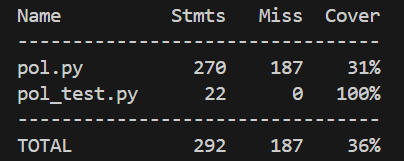

Генерація коду на основі тестів.

In [ ]:
class Mono:
    def __init__(self, coefficient, degree):
        self.coefficient = coefficient
        self.degree = degree
        self.next = None

    def __str__(self):
        if self.degree == 0:
            return f"Mono: {self.coefficient}"
        elif self.degree == 1:
            return f"Mono: {self.coefficient}x"
        else:
            return f"Mono: {self.coefficient}x**{self.degree}"

    def __repr__(self):
        return f"Mono(coeff={self.coefficient}, degree={self.degree})"


class Polynomial:
    def __init__(self, *monos):
        self.head = None
        for mono in monos:
            if self.head is None:
                self.head = mono
            else:
                current = self.head
                while current.next:
                    current = current.next
                current.next = mono

    def __str__(self):
        current = self.head
        result = ""
        while current:
            if current != self.head and current.coefficient > 0:
                result += "+"
            result += str(current)
            current = current.next
        return f"Polynomial: {result}"

    def __repr__(self):
        result = ""
        current = self.head
        while current:
            result += repr(current)
            if current.next:
                result += " -> "
            current = current.next
        return f"Polynomial({result})"

    def __eq__(self, other):
        if isinstance(other, Polynomial):
            return repr(self) == repr(other)
        return False

    def __add__(self, other):
        result = Polynomial()
        current_self = self.head
        current_other = other.head

        while current_self or current_other:
            if current_self and current_other:
                if current_self.degree == current_other.degree:
                    result += Polynomial(Mono(current_self.coefficient + current_other.coefficient, current_self.degree))
                    current_self = current_self.next
                    current_other = current_other.next
                elif current_self.degree > current_other.degree:
                    result += Polynomial(current_self)
                    current_self = current_self.next
                else:
                    result += Polynomial(current_other)
                    current_other = current_other.next
            elif current_self:
                result += Polynomial(current_self)
                current_self = current_self.next
            else:
                result += Polynomial(current_other)
                current_other = current_other.next

        return result

При запуску цього коду на cms я отримала такий вивід:

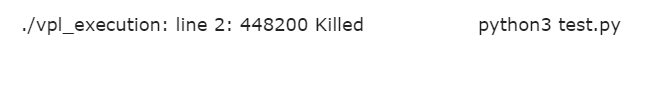

При перевірці юніттестами я отримала таку помилку:

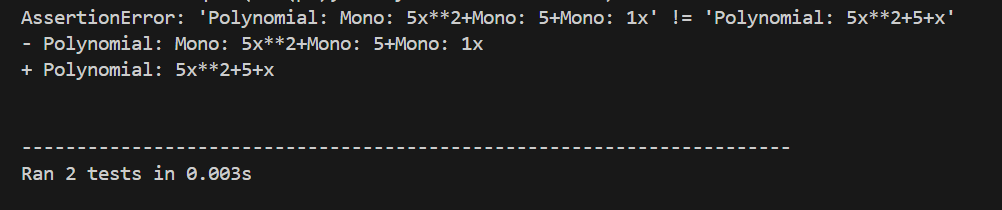

Я попросила ШІ оптимізувати тести з найбільшим відсотком покриття.
Результат:

In [ ]:
import unittest
from your_module import Mono, Polynomial

class TestMono(unittest.TestCase):
    def setUp(self):
        self.mono = Mono(2, 3)

    def test_str(self):
        self.assertEqual(str(self.mono), "Mono: 2x**3")
    
    def test_repr(self):
        self.assertEqual(repr(self.mono), "Mono(coeff=2, degree=3)")

    # Add more tests for other methods of Mono class if needed

class TestPolynomial(unittest.TestCase):
    def setUp(self):
        mono1 = Mono(2, 3)
        mono2 = Mono(-1, 2)
        self.poly1 = Polynomial(mono1)
        self.poly2 = Polynomial(mono2)
        self.expected = Polynomial(Mono(2, 3), Mono(-1, 2))

    def test_str(self):
        self.assertEqual(str(self.poly1), "Polynomial: 2x**3")
    
    def test_repr(self):
        self.assertEqual(repr(self.poly1), "Polynomial(Mono(coeff=2, degree=3))")

    def test_add(self):
        result = self.poly1 + self.poly2
        self.assertEqual(result, self.expected)

    # Add more tests for other methods of Polynomial class if needed

if __name__ == '__main__':
    unittest.main()


Виникло дві помилки:

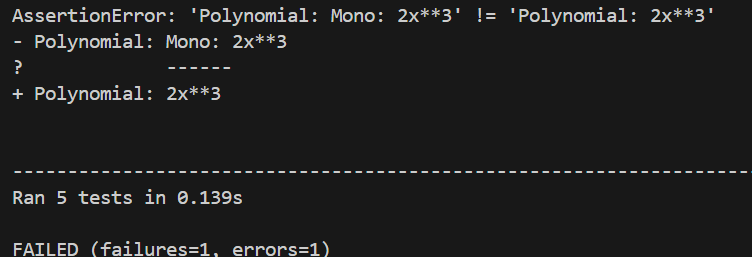

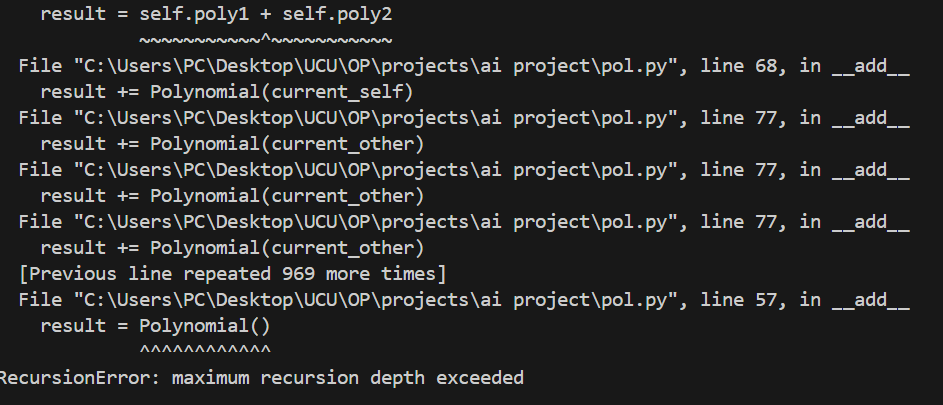

Проте покриття збільшилося:

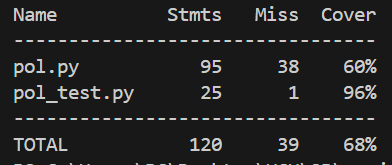

Час виконання до оптимізації:

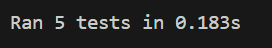

Час виконання після оптимізації:

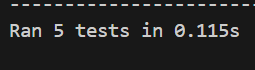

Час виконання зменшився.